[강의출처 : 전북대학교 기계학습특강](https://guebin.github.io/STML2022/)

# Imports

In [2]:
import torch
import torchvision
from fastai.vision.all import *
import matplotlib.pyplot as plt

In [3]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }');

# 깊은신경망-오버피팅

## 데이터

`-` model : $yi = (0 \times x_i) +ɛ_i$ 

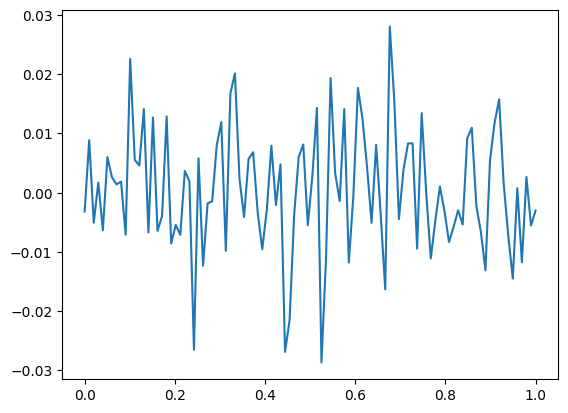

In [4]:
torch.manual_seed(202150256)

x = torch.linspace(0,1,100).reshape(-1,1)
y = torch.randn(100).reshape(100,1)*0.01
plt.plot(x,y)

## 모든 데이터를 사용하여 적합(512, relu, 1000 epochs)

In [6]:
torch.manual_seed(5)

net = torch.nn.Sequential(
    torch.nn.Linear(1,512),
    torch.nn.ReLU(),
    torch.nn.Linear(512,1)
  )

loss_fn = torch.nn.MSELoss()
opt = torch.optim.Adam(net.parameters())

for epoc in range(1000) :

    yhat = net(x)

    loss = loss_fn(yhat,y)

    loss.backward()

    opt.step()

    opt.zero_grad()

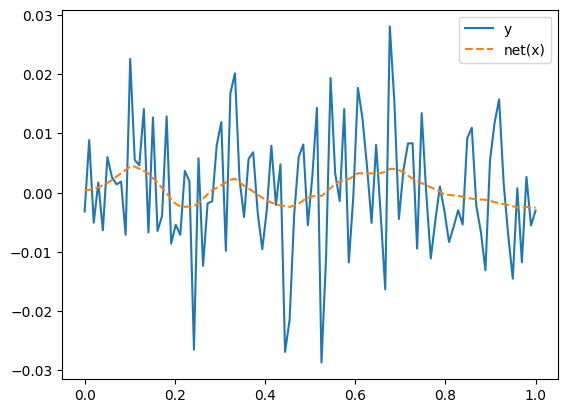

In [9]:
plt.plot(x,y)
plt.plot(x,yhat.data,"--")
plt.legend(["y", "net(x)"])

##  데이터 셋 분할

`-` 데이터를 8:2로 나눔

In [12]:
xtr = x[:80]
ytr = y[:80]

xtest = x[80:]
ytest = y[80:]

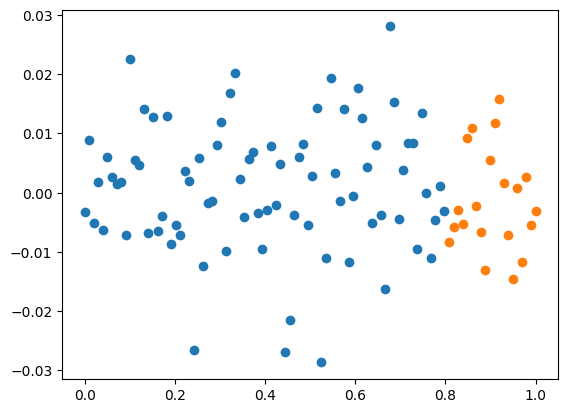

In [13]:
plt.plot(xtr,ytr,"o")
plt.plot(xtest,ytest,"o")

`-` train data만 가지고 net을 학습

In [46]:
torch.manual_seed(5)

net = torch.nn.Sequential(
    torch.nn.Linear(1,512),
    torch.nn.ReLU(),
    torch.nn.Linear(512,1)
  )

loss_fn = torch.nn.MSELoss()
opt = torch.optim.Adam(net.parameters())

for epoc in range(1000) :

    yhat = net(xtr)

    loss = loss_fn(yhat,ytr)

    loss.backward()

    opt.step()

    opt.zero_grad()

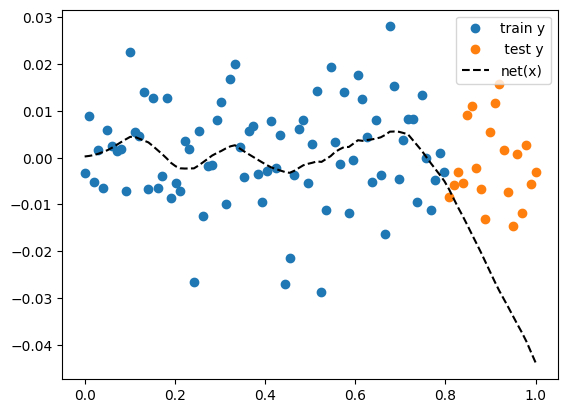

In [47]:
plt.plot(xtr,ytr,"o")
plt.plot(xtest,ytest,"o")
plt.plot(x,net(x).data,"--k")
plt.legend(["train y"," test y","net(x)"])

`-` train 데이터에만 과적합된 오버피팅이라고 볼 수 있다.

`-` 오버피팅

1. 오차항을 따라간다 $\to$ 학습하지말아야 할 것들을 학습하는 것임

2. 데이터의 수는 적은데 노드를 너무 과하게 잡은 경우 오버피팅이 일어날 수 있다.

## 오버피팅의 해결 : 드랍아웃

`-` 오버피팅을 무조건적으로 해결할 수 있는 것은 아님

`-` 오버피팅을 해결하기 위한 방법들은 많다 $\to$ 완벽한 방법은 없다는 것임.

In [77]:
torch.manual_seed(1) 
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(in_features=512,out_features=1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

for epoc in range(1000):
    ## 1 
    #
    ## 2 
    loss = loss_fn(net(xtr),ytr) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

Text(0.5, 1.0, 'network is in training mode')

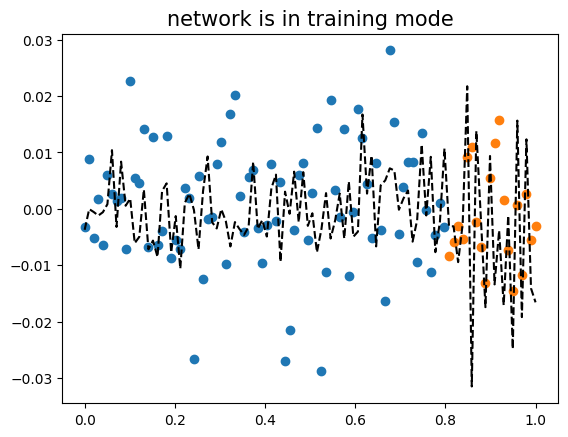

In [82]:
plt.plot(xtr,ytr,'o')
plt.plot(xtest,ytest,'o')
plt.plot(x,net(x).data,'--k') 
plt.title("network is in training mode",fontsize=15)

`-` 코드를 실행하면 그림이 계속 바뀐다? 먼가 틀린것임

In [67]:
net.eval()

Sequential(
  (0): Linear(in_features=1, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.8, inplace=False)
  (3): Linear(in_features=512, out_features=1, bias=True)
)

In [66]:
net.training

False

Text(0.5, 1.0, 'network is in evaluation model')

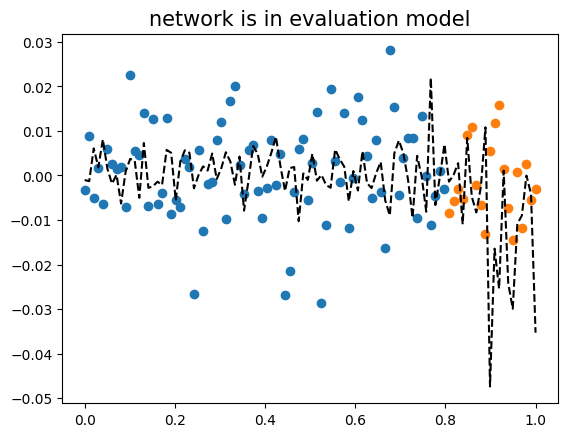

In [84]:
plt.plot(xtr,ytr,'o')
plt.plot(xtest,ytest,'o')
plt.plot(x,net(x).data,'--k') 
plt.title("network is in evaluation model",fontsize=15)

## 드랍아웃 레이어

`-` 질문 1 : 왜 그림이 랜덤으로 나올까?

In [72]:
_x = torch.linspace(0,1,101)
_x

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900, 1.0000])

In [73]:
dout = torch.nn.Dropout(0.90)
dout

Dropout(p=0.9, inplace=False)

In [74]:
dout(_x)

tensor([0.0000, 0.1000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.7000,
        0.0000, 1.9000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 3.5000,
        0.0000, 0.0000, 0.0000, 3.9000, 0.0000, 4.1000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 4.7000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 5.6000, 0.0000, 0.0000, 0.0000, 6.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 7.1000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 7.9000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 9.7000, 0.0000,
        9.9000, 0.0000])

`-` 드랍아웃 레이어를 통과하니까 0으로 바뀐애들이 많고 10배이상 증가한 값들이 보인다.

In [75]:
dout(_x)

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  2.0000,  0.0000,  2.2000,  0.0000,
         0.0000,  0.0000,  2.6000,  0.0000,  0.0000,  2.9000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  7.9000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  8.6000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.00

`-` 심지어 결과도 랜덤 $\to$ 드랍아웃레이어를 통과한 애들은 90%는 0값이 되고 살아남은 애들은 값이 10배 증가한다.

`-` 정리

1. 구조 : 입력 -> 드랍아웃레이어 -> 출력

2. 입력의 일부를 임의로 0으로 만듬

3. 0이 안된것들은 스칼라배하여 드랍아웃을 통과한 모든 숫자들의 총합이 일정하게 되도록 조정

4. 의미 : each iteration 마다 학습에 참여하는 노드가 랜덤으로 결정됨

5. 모든 노드가 골고루 학습 가능 + 한 두개의 특화된 능력치가 개발되기보다 평균적인 능력치가 전반적으로 개선됨 $\to$ 이상치의 영향도 줄일 수 있다!

# 이미지자료 분석

`-` 데이터 다운

In [85]:
path = untar_data(URLs.MNIST)

`-` train

In [86]:
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'training/1').ls()])
X = torch.concat([X0,X1])/255
y = torch.tensor([0.0]*len(X0) + [1.0]*len(X1)).reshape(-1,1)

`-` test

In [87]:
X0 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/0').ls()])
X1 = torch.stack([torchvision.io.read_image(str(fname)) for fname in (path/'testing/1').ls()])
XX = torch.concat([X0,X1])/255
yy = torch.tensor([0.0]*len(X0) + [1.0]*len(X1)).reshape(-1,1)

## 기존의 MLP 모형

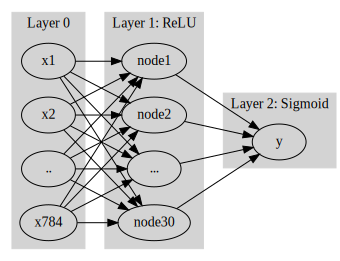

In [88]:
#|echo : true
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    
    "x784" -> "node1"
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node30"
    "x2" -> "node30"
    ".." -> "node30"
    "x784" -> "node30"


    label = "Layer 1: ReLU"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "y"
    "node2" -> "y"
    "..." -> "y"
    "node30" -> "y"
    label = "Layer 2: Sigmoid"
}
''')

`-` 왜 `28 x 28` 이미지를 784개의 벡터로 만든 다음 모형을 돌려야 하는가?

`-` 기존에 개발된 모형이 회귀분석 기반으로 되어있어서 결국 회귀분석 틀에 짜 맞추어 이미지 자료를 분석하는 느낌이다.

## 새로운 아키텍처의 제시

`-` 예전

$\underset{(n,784)} {\bf{X}} \overset{l_1}{\to} \underset{(n,30)}{u^{(1)}} \overset{a_1}{\to} \underset{(n,30)}{v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{v^{(2)}} = \underset{(n,1)}{\hat{y}}$

* $l_1$ : 선형변환, feature를 뻥튀기 하는 역할

* $relu$ : 뻥튀기된 feature에 비선형을 추가하여 표현력 극대화

* $l_2$ : 선형변환, 뻥튀기된 feature를 요약하는 역할

`-` 새로운 아키텍처

* $conv$ : feature를 뻥튀기하는 역할

* $relu$

* $pooling$ : feature 요약

### CONV 레이어

`-` 연산법

**(예시1)**

In [89]:
torch.manual_seed(202150256)

_conv = torch.nn.Conv2d(1,1,(2,2)) ## 입력, 출력, (2,2) window size

_conv.weight.data, _conv.bias.data

(tensor([[[[-0.4338, -0.0241],
           [ 0.4315, -0.3468]]]]),
 tensor([-0.2340]))

In [90]:
_X = torch.arange(0,4).reshape(1,2,2).float()
_X

tensor([[[0., 1.],
         [2., 3.]]])

In [94]:
(-0.4338)*0 + ( -0.0241)*1 + (0.4315)*2 + (-0.3468)*3 +(-0.2340)

-0.4355

In [95]:
_conv(_X)

tensor([[[-0.4357]]], grad_fn=<SqueezeBackward1>)

**(예시2)** : 평균도 계산 가능할 것 같다.

In [96]:
_conv.weight.data = torch.tensor([[[[1/4, 1/4],[1/4,1/4]]]])
_conv.bias.data = torch.tensor([0.0])

In [97]:
_conv(_X) , (0+1+2+3)/4

(tensor([[[1.5000]]], grad_fn=<SqueezeBackward1>), 1.5)

**(예시3)** 이동평균?

In [99]:
_X = torch.arange(0,25).float().reshape(1,5,5)
_X

tensor([[[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.],
         [15., 16., 17., 18., 19.],
         [20., 21., 22., 23., 24.]]])

In [100]:
_conv(_X)

tensor([[[ 3.,  4.,  5.,  6.],
         [ 8.,  9., 10., 11.],
         [13., 14., 15., 16.],
         [18., 19., 20., 21.]]], grad_fn=<SqueezeBackward1>)

**(예시4) windowsize가 증가한다면?**

In [101]:
_conv = torch.nn.Conv2d(1,1,(3,3)) # 입력1, 출력1, (3,3) window size
_conv.bias.data = torch.tensor([0.0])
_conv.weight.data = torch.tensor([[[[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]]])

In [102]:
_X,_conv(_X)

(tensor([[[ 0.,  1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.,  9.],
          [10., 11., 12., 13., 14.],
          [15., 16., 17., 18., 19.],
          [20., 21., 22., 23., 24.]]]),
 tensor([[[ 6.0000,  7.0000,  8.0000],
          [11.0000, 12.0000, 13.0000],
          [16.0000, 17.0000, 18.0000]]], grad_fn=<SqueezeBackward1>))

**(예시5) feature 뻥튀기** (8로 뻥튀기)

In [103]:
_X = torch.tensor([1.0,1.0,1.0,1.0]).reshape(1,2,2)
_X

tensor([[[1., 1.],
         [1., 1.]]])

In [104]:
_conv = torch.nn.Conv2d(1,8,(2,2))
_conv.weight.data.shape,_conv.bias.data.shape

(torch.Size([8, 1, 2, 2]), torch.Size([8]))

In [113]:
_conv(_X).shape

torch.Size([8, 1, 1])

In [117]:
_conv(_X)[0,...]

tensor([[0.1347]], grad_fn=<SelectBackward0>)

`? + _conv.bias.data[0]`의 의미!

In [118]:
_conv.weight.data[0,...]

tensor([[[-0.2673,  0.4762],
         [-0.2815,  0.2967]]])

In [106]:
torch.sum(_conv.weight.data[0,...])+_conv.bias.data[0],\
torch.sum(_conv.weight.data[1,...])+_conv.bias.data[1]

(tensor(0.1347), tensor(-0.7670))

In [107]:
torch.sum(_conv.weight.data,axis=(2,3)).reshape(-1)+ _conv.bias.data

tensor([ 0.1347, -0.7670,  0.5132, -0.3334,  0.6376,  0.6994,  0.6399,  0.9393])

결국 아래를 계산한 것임

In [121]:
_conv(_X).reshape(-1)

tensor([ 0.1347, -0.7670,  0.5132, -0.3334,  0.6376,  0.6994,  0.6399,  0.9393],
       grad_fn=<ReshapeAliasBackward0>)

### ReLU(2d)

In [122]:
_X = torch.randn(25).reshape(1,5,5)
_X

tensor([[[ 0.3294, -2.6685, -0.7108,  1.3801,  3.1776],
         [ 0.5248,  0.3491,  0.2382, -0.5133, -0.8363],
         [-0.5835, -0.2984, -0.5396, -0.1182,  1.1060],
         [-0.5037, -0.4344, -2.1023,  0.0490, -0.4926],
         [ 0.8037,  0.2467,  1.1374, -0.4208, -1.0173]]])

In [123]:
a1=torch.nn.ReLU()

In [124]:
a1(_X)

tensor([[[0.3294, 0.0000, 0.0000, 1.3801, 3.1776],
         [0.5248, 0.3491, 0.2382, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 1.1060],
         [0.0000, 0.0000, 0.0000, 0.0490, 0.0000],
         [0.8037, 0.2467, 1.1374, 0.0000, 0.0000]]])

### Maxpooling 레이어

`-` 설정한 윈도우 사이즈내에서 가장 큰 값을 산출함.

In [125]:
_maxpooling = torch.nn.MaxPool2d((2,2))

In [126]:
_X = torch.arange(16).float().reshape(1,4,4) 

In [127]:
_X, _maxpooling(_X) 

(tensor([[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]),
 tensor([[[ 5.,  7.],
          [13., 15.]]]))

`-` 아래처럼 윈도우 사이즈에 포함되지 않고 경계에 있는 값들은 버린다.

In [128]:
_X = torch.arange(25).float().reshape(1,5,5) 

In [129]:
_X, _maxpooling(_X) 

(tensor([[[ 0.,  1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.,  9.],
          [10., 11., 12., 13., 14.],
          [15., 16., 17., 18., 19.],
          [20., 21., 22., 23., 24.]]]),
 tensor([[[ 6.,  8.],
          [16., 18.]]]))

In [130]:
_X = torch.arange(36).float().reshape(1,6,6) 

In [131]:
_X, _maxpooling(_X)

(tensor([[[ 0.,  1.,  2.,  3.,  4.,  5.],
          [ 6.,  7.,  8.,  9., 10., 11.],
          [12., 13., 14., 15., 16., 17.],
          [18., 19., 20., 21., 22., 23.],
          [24., 25., 26., 27., 28., 29.],
          [30., 31., 32., 33., 34., 35.]]]),
 tensor([[[ 7.,  9., 11.],
          [19., 21., 23.],
          [31., 33., 35.]]]))

### 이미지자료분석 - CNN 구현(CPU)

In [132]:
X.shape

torch.Size([12665, 1, 28, 28])

#### (1)  Conv2d

In [133]:
c1 = torch.nn.Conv2d(1,16,(5,5))
print(X.shape)
print(c1(X).shape)

torch.Size([12665, 1, 28, 28])
torch.Size([12665, 16, 24, 24])


#### (2) ReLU

In [134]:
a1 = torch.nn.ReLU()
print(X.shape)
print(c1(X).shape)
print(a1(c1(X)).shape)

torch.Size([12665, 1, 28, 28])
torch.Size([12665, 16, 24, 24])
torch.Size([12665, 16, 24, 24])


#### (3) MaxPool2D

In [135]:
m1 =  torch.nn.MaxPool2d((2,2)) 
print(X.shape)
print(c1(X).shape)
print(a1(c1(X)).shape)
print(m1(a1(c1(X))).shape)

torch.Size([12665, 1, 28, 28])
torch.Size([12665, 16, 24, 24])
torch.Size([12665, 16, 24, 24])
torch.Size([12665, 16, 12, 12])


#### (4) 시그모이드

`-` 펼치자.

(방법 1)

In [136]:
m1(a1(c1(X))).reshape(-1,2304).shape

torch.Size([12665, 2304])

In [138]:
16*12*12

2304

(방법 2)

In [139]:
flttn = torch.nn.Flatten()

In [143]:
print(X.shape)
print("\n")
print(c1(X).shape)
print("\n")
print(a1(c1(X)).shape)
print("\n")
print(m1(a1(c1(X))).shape)
print("\n")
print(flttn(m1(a1(c1(X)))).shape)

torch.Size([12665, 1, 28, 28])


torch.Size([12665, 16, 24, 24])


torch.Size([12665, 16, 24, 24])


torch.Size([12665, 16, 12, 12])


torch.Size([12665, 2304])


In [145]:
12*12*16

2304

`-` 16 x 12 x 12 = 2304를 1로 차원축소하는 선형레이어를 설계

In [146]:
l1 = torch.nn.Linear(in_features=2304,out_features=1) 
print(X.shape)
print(c1(X).shape)
print(a1(c1(X)).shape)
print(m1(a1(c1(X))).shape)
print(flttn(m1(a1(c1(X)))).shape)
print(l1(flttn(m1(a1(c1(X))))).shape)

torch.Size([12665, 1, 28, 28])
torch.Size([12665, 16, 24, 24])
torch.Size([12665, 16, 24, 24])
torch.Size([12665, 16, 12, 12])
torch.Size([12665, 2304])
torch.Size([12665, 1])


`-`  시그모이드

In [147]:
a2 = torch.nn.Sigmoid()

In [148]:
l1 = torch.nn.Linear(in_features=2304,out_features=1) 
print(X.shape)
print(c1(X).shape)
print(a1(c1(X)).shape)
print(m1(a1(c1(X))).shape)
print(flttn(m1(a1(c1(X)))).shape)
print(l1(flttn(m1(a1(c1(X))))).shape)
print(a1(l1(flttn(m1(a1(c1(X)))))).shape)

torch.Size([12665, 1, 28, 28])
torch.Size([12665, 16, 24, 24])
torch.Size([12665, 16, 24, 24])
torch.Size([12665, 16, 12, 12])
torch.Size([12665, 2304])
torch.Size([12665, 1])
torch.Size([12665, 1])


`-` 네트워크 설계

In [151]:
net = torch.nn.Sequential(
    c1, # 2d: 컨볼루션(선형변환), 피처 뻥튀기 
    a1, # 2d: 렐루(비선형변환)
    m1, # 2d: 맥스풀링: 데이터요약
    flttn, # 2d->1d 
    l1, # 1d: 선형변환
    a2 # 1d: 시그모이드(비선형변환) 
)

In [152]:
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())

In [153]:
t1= time.time()
for epoc in range(100): 
    ## 1
    yhat = net(X) 
    ## 2
    loss = loss_fn(yhat,y) 
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()
t2= time.time()
t2-t1

63.58483362197876

Text(0.5, 1.0, 'Traning Set')

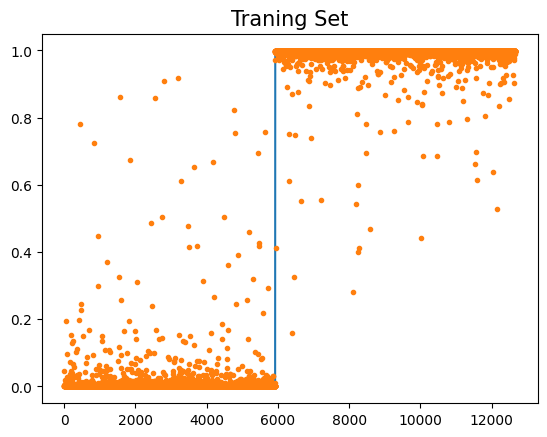

In [154]:
plt.plot(y)
plt.plot(net(X).data,'.')
plt.title('Traning Set',size=15)

Text(0.5, 1.0, 'Test Set')

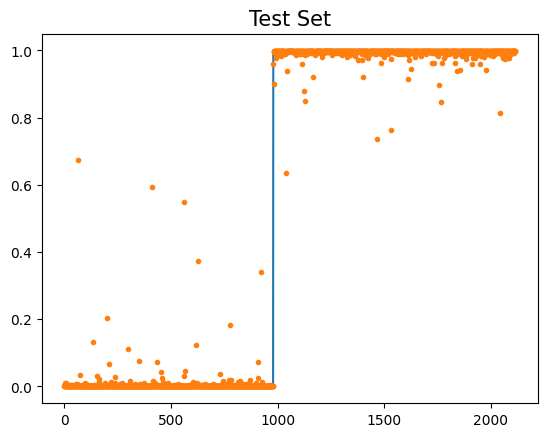

In [155]:
plt.plot(yy)
plt.plot(net(XX).data,'.')
plt.title('Test Set',size=15)

### 이미지자료분석 - CNN 구현(GPU)

#### 1. dls

`-` train, test에 데이터로더를 만듬

In [156]:
ds1=torch.utils.data.TensorDataset(X,y)
ds2=torch.utils.data.TensorDataset(XX,yy)

In [157]:
X.shape

torch.Size([12665, 1, 28, 28])

In [158]:
len(X)/10

1266.5

In [159]:
len(XX)

2115

In [160]:
dl1 = torch.utils.data.DataLoader(ds1,batch_size=1266) 
dl2 = torch.utils.data.DataLoader(ds2,batch_size=2115) 

In [162]:
dls = DataLoaders(dl1,dl2) # 이거 fastai 지원함수

####  2. lrnr 생성: 아키텍처, 손실함수, 옵티마이저

In [163]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten(),
    torch.nn.Linear(2304,1),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()

In [164]:
lrnr = Learner(dls,net,loss_fn)

#### 3. 학습

In [165]:
lrnr.fit(10) 

epoch,train_loss,valid_loss,time
0,0.982732,0.626775,00:07
1,0.691524,0.396832,00:00
2,0.541695,0.243815,00:00
3,0.427542,0.125900,00:00
4,0.332859,0.071563,00:00
5,0.260606,0.046392,00:00
6,0.206652,0.033661,00:00
7,0.166002,0.026269,00:00
8,0.134841,0.021473,00:00
9,0.110564,0.018103,00:00


#### 4. 예측 및 시각화

In [166]:
net.to("cpu") 

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=2304, out_features=1, bias=True)
  (5): Sigmoid()
)

Text(0.5, 1.0, 'Test Set')

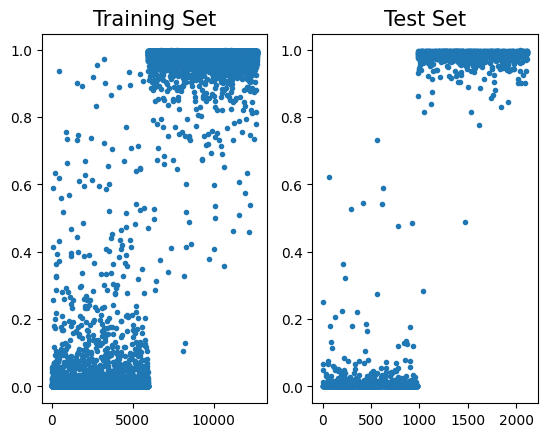

In [169]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(net(X).data,'.')
ax1.set_title("Training Set",size=15)

ax2.plot(net(XX).data,'.')
ax2.set_title("Test Set",size=15)

`-` 빠르고 적합 결과도 좋음

#### Lrnr 오브젝트

In [170]:
lrnr.model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=2304, out_features=1, bias=True)
  (5): Sigmoid()
)

In [171]:
id(lrnr.model), id(net)

(140372776204512, 140372776204512)

In [172]:
lrnr.model(X)

tensor([[3.7152e-03],
        [4.3479e-04],
        [3.2712e-03],
        ...,
        [9.8917e-01],
        [9.9076e-01],
        [9.9411e-01]], grad_fn=<SigmoidBackward0>)

# BCEWithLogitsLoss

`-` BCEWithLogitsLoss = Sigmoid + BCELoss

`-` 수치적으로 더 안정

## dls 만들기

In [174]:
ds1=torch.utils.data.TensorDataset(X,y)
ds2=torch.utils.data.TensorDataset(XX,yy)

In [174]:
dl1 = torch.utils.data.DataLoader(ds1,batch_size=1266) 
dl2 = torch.utils.data.DataLoader(ds2,batch_size=2115) 

In [175]:
dls = DataLoaders(dl1,dl2) 

## lrnr 생성

In [176]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(1,16,(5,5)),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d((2,2)),
    torch.nn.Flatten(),
    torch.nn.Linear(2304,1),
    #torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCEWithLogitsLoss()
lrnr = Learner(dls,net,loss_fn) 

## 학습

In [177]:
lrnr.fit(10)

epoch,train_loss,valid_loss,time
0,0.945972,0.627159,00:00
1,0.697180,0.423320,00:00
2,0.557252,0.285192,00:00
3,0.451076,0.165580,00:00
4,0.359250,0.096741,00:00
5,0.285009,0.060552,00:00
6,0.227394,0.041350,00:00
7,0.183023,0.030467,00:00
8,0.148572,0.023763,00:00
9,0.121533,0.019332,00:00


## 예측 및 시각화

In [178]:
net.to("cpu")

Sequential(
  (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=2304, out_features=1, bias=True)
)

In [179]:
net(X)

tensor([[-5.7707],
        [-8.0542],
        [-5.9666],
        ...,
        [ 4.1716],
        [ 4.7260],
        [ 4.9744]], grad_fn=<AddmmBackward0>)

Text(0.5, 0.98, 'Training Set')

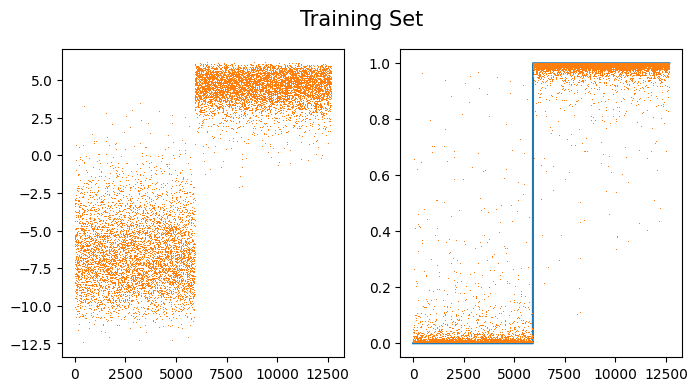

In [180]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(net(X).data,',',color="C1")
ax[1].plot(y)
ax[1].plot(a2(net(X)).data,',')
fig.suptitle("Training Set",size=15)

Text(0.5, 0.98, 'Test Set')

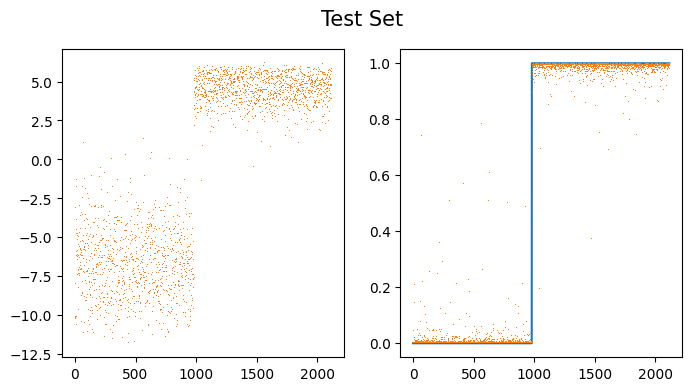

In [181]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(net(XX).data,',',color="C1")
ax[1].plot(yy)
ax[1].plot(a2(net(XX)).data,',')
fig.suptitle("Test Set",size=15)